## Tasks

- linear kernel SVC
- non-linear kernel SVC
- linear SVC with OvR (One-vs-Rest)

## 1.Import libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


## 2.Load dataset

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Display the first 5 rows of the dataset
df = pd.DataFrame(X, columns=iris.feature_names)
df['Species'] = y
print("First 5 rows of the Iris dataset:")
print(df.head())


First 5 rows of the Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [3]:
df['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

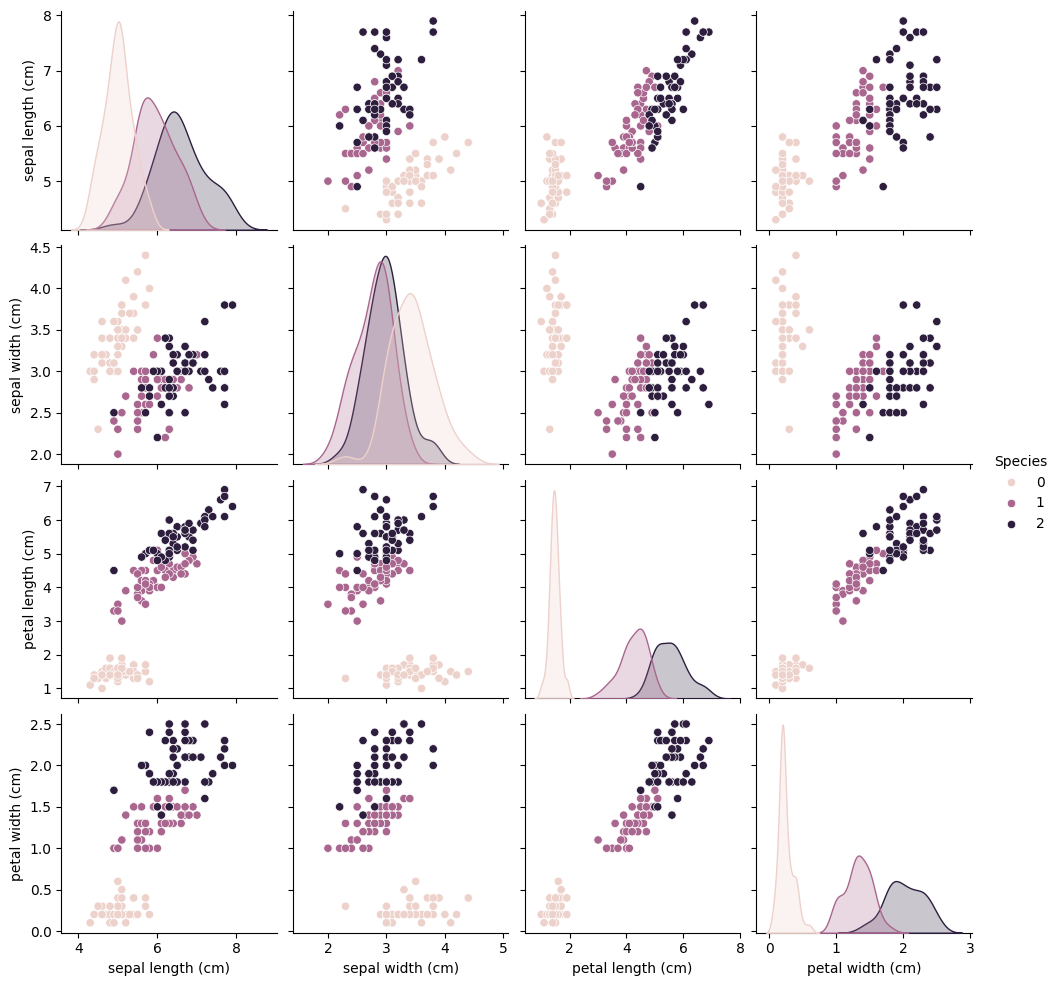

In [4]:
sns.pairplot(data = df, hue = 'Species')

In [5]:
# Choose 2 classes for binary classfication
df_2class = df[df['Species'] !=0]
X = df_2class.drop('Species', axis = 1)
y = df_2class['Species']

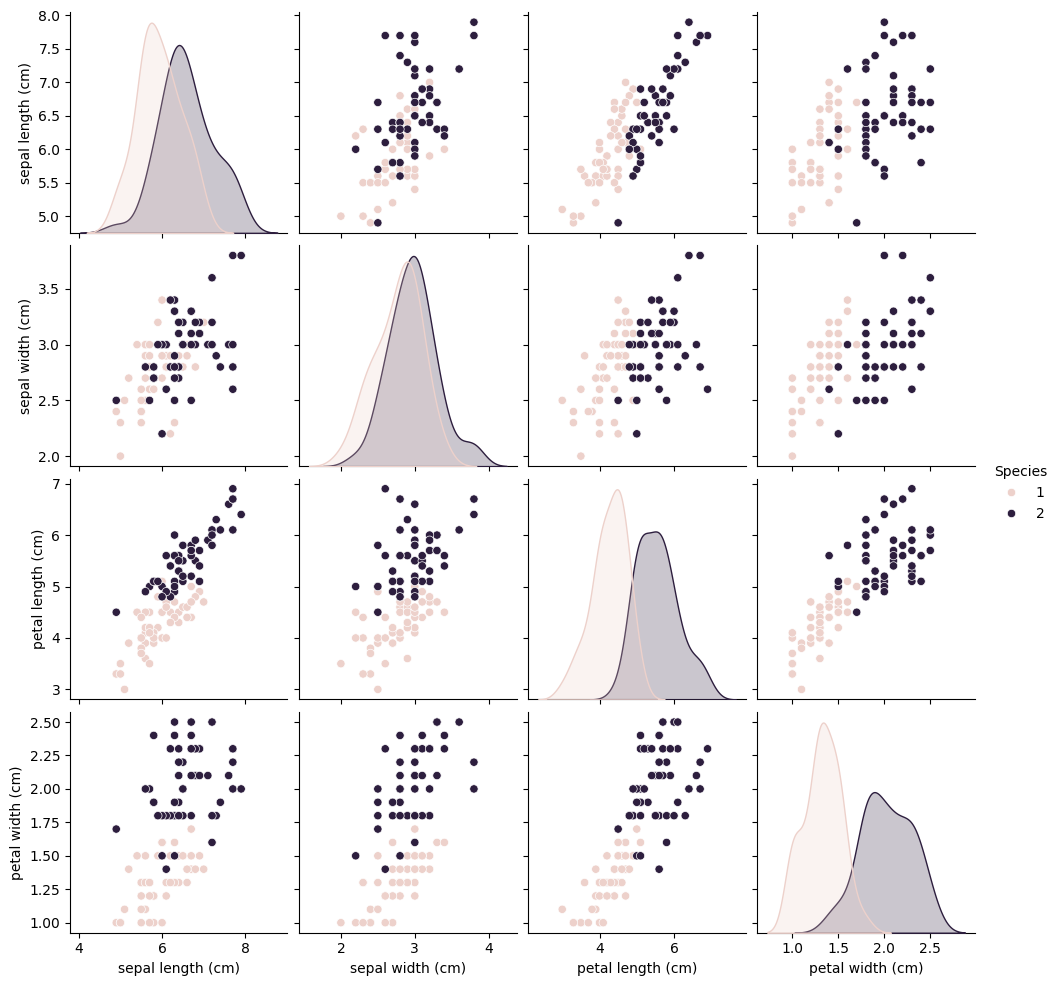

In [6]:
sns.pairplot(data = df_2class, hue = 'Species')

## 3. Preprocess dataset

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#


In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for SVM and Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## 4.SVM for Classification (SVC)

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC


In [8]:
# Train and evaluate SVM
print("\nSupport Vector Machine (SVM):")
svm = SVC(kernel='linear', random_state=42)  # Use a linear kernel for simplicity
svm.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy of SVM: {accuracy_svm:.2f}")

# Display SVM parameters
print("\nSVM Parameters:")
print(f"Support Vectors: {svm.support_vectors_.shape}")
print(f"Number of Support Vectors: {len(svm.support_)}")



Support Vector Machine (SVM):
Accuracy of SVM: 0.90

SVM Parameters:
Support Vectors: (9, 4)
Number of Support Vectors: 9


In [9]:
# Classification report

print("\nClassification Report for SVM:")
print(classification_report(y_test, y_pred_svm, target_names=iris.target_names[1:3]))


Classification Report for SVM:
              precision    recall  f1-score   support

  versicolor       1.00      0.82      0.90        17
   virginica       0.81      1.00      0.90        13

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.90        30
weighted avg       0.92      0.90      0.90        30



## 5.Non-linear kernel for SVM

Use a non-linear kernel (e.g. rbf)

In [10]:
# Train SVM with RBF kernel
print("\nTraining SVM with RBF kernel...")
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1.0, random_state=42)  # RBF kernel
svm_rbf.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_rbf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of SVM with RBF kernel: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names[1:3]))



Training SVM with RBF kernel...

Accuracy of SVM with RBF kernel: 0.87

Classification Report:
              precision    recall  f1-score   support

  versicolor       0.84      0.94      0.89        17
   virginica       0.91      0.77      0.83        13

    accuracy                           0.87        30
   macro avg       0.88      0.86      0.86        30
weighted avg       0.87      0.87      0.86        30




Plotting decision boundaries for the first two features...


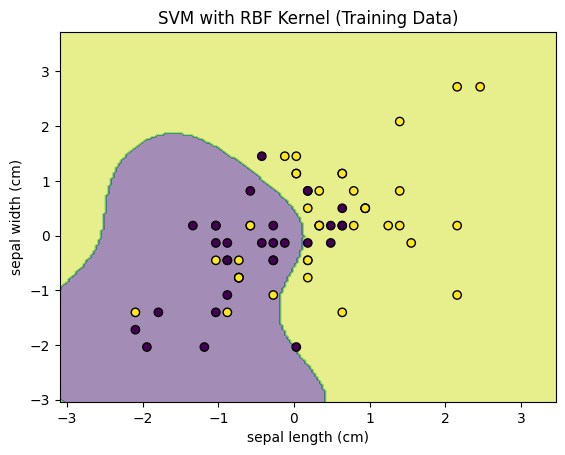

In [11]:
# Visualize decision boundaries (for 2D visualization)
from sklearn.inspection import DecisionBoundaryDisplay

def plot_decision_boundaries(X, y, model, title):
    feature_1, feature_2 = 0, 1  # Use the first two features for visualization
    X_2d = X[:, [feature_1, feature_2]]
    model.fit(X_2d, y)  # Retrain the model on the 2D subset

    disp = DecisionBoundaryDisplay.from_estimator(
        model, X_2d, response_method="predict",
        xlabel=iris.feature_names[feature_1], ylabel=iris.feature_names[feature_2],
        alpha=0.5, grid_resolution=200
    )
    disp.ax_.scatter(X_2d[:, 0], X_2d[:, 1], c=y, edgecolor="k")
    plt.title(title)
    plt.show()


# Plot decision boundaries for the first two features
print("\nPlotting decision boundaries for the first two features...")
plot_decision_boundaries(X_train, y_train, svm_rbf, "SVM with RBF Kernel (Training Data)")

## Your work

Use SVM algorithm with linear and non-linear kernels (poly, rbf, sigmoid) for all the 3 classes in Iris dataset.Plot the data pionts and decision boundaries for each kernel. Take the sepal length as X-axis and the sepal width as y-axis.

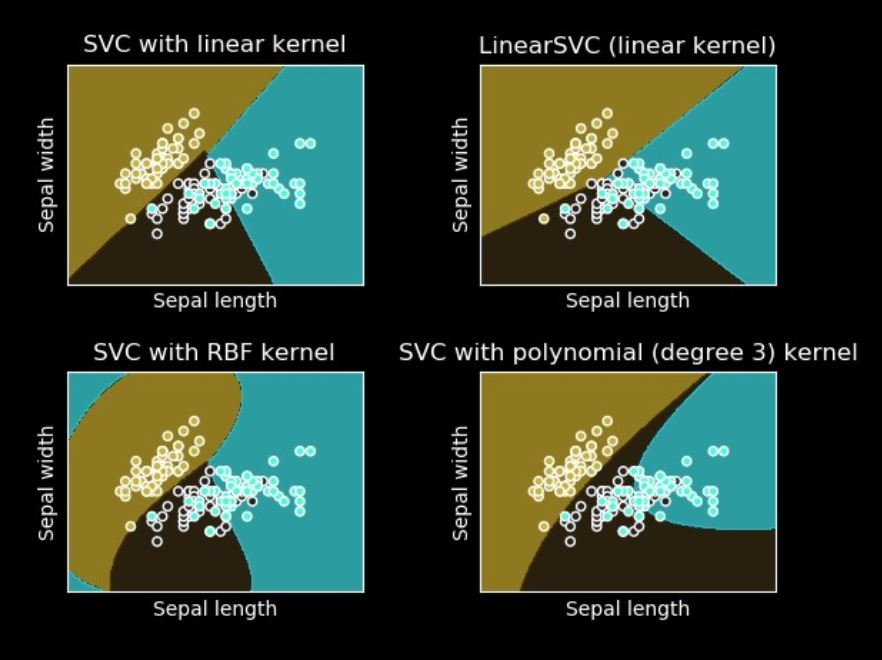

Complete the remaining steps and send the notebook to zwu009@citymail.cuny.edu by 5:00 pm Feb 13, 2025.

In [12]:
# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Taking only Sepal Length and Sepal Width
y = iris.target

In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [14]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Define SVM models with different kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
models = {}

for kernel in kernels:
    models[kernel] = SVC(kernel=kernel, gamma='scale', probability=True)
    models[kernel].fit(X_train, y_train)


In [20]:
# Evaluate models and print accuracy
for kernel, model in models.items():
    y_pred = model.predict(X_test)
    print(f"Kernel: {kernel}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

Kernel: linear
Accuracy: 0.6889
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.53      0.60      0.56        15
           2       0.54      0.47      0.50        15

    accuracy                           0.69        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.69      0.69      0.69        45

--------------------------------------------------
Kernel: poly
Accuracy: 0.6889
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.52      1.00      0.68        15
           2       1.00      0.13      0.24        15

    accuracy                           0.69        45
   macro avg       0.84      0.69      0.63        45
weighted avg       0.84      0.69      0.63        45

--------------------------------------------------
Kernel: rbf
Accuracy: 0.6889
              precision    recall  f1-score  

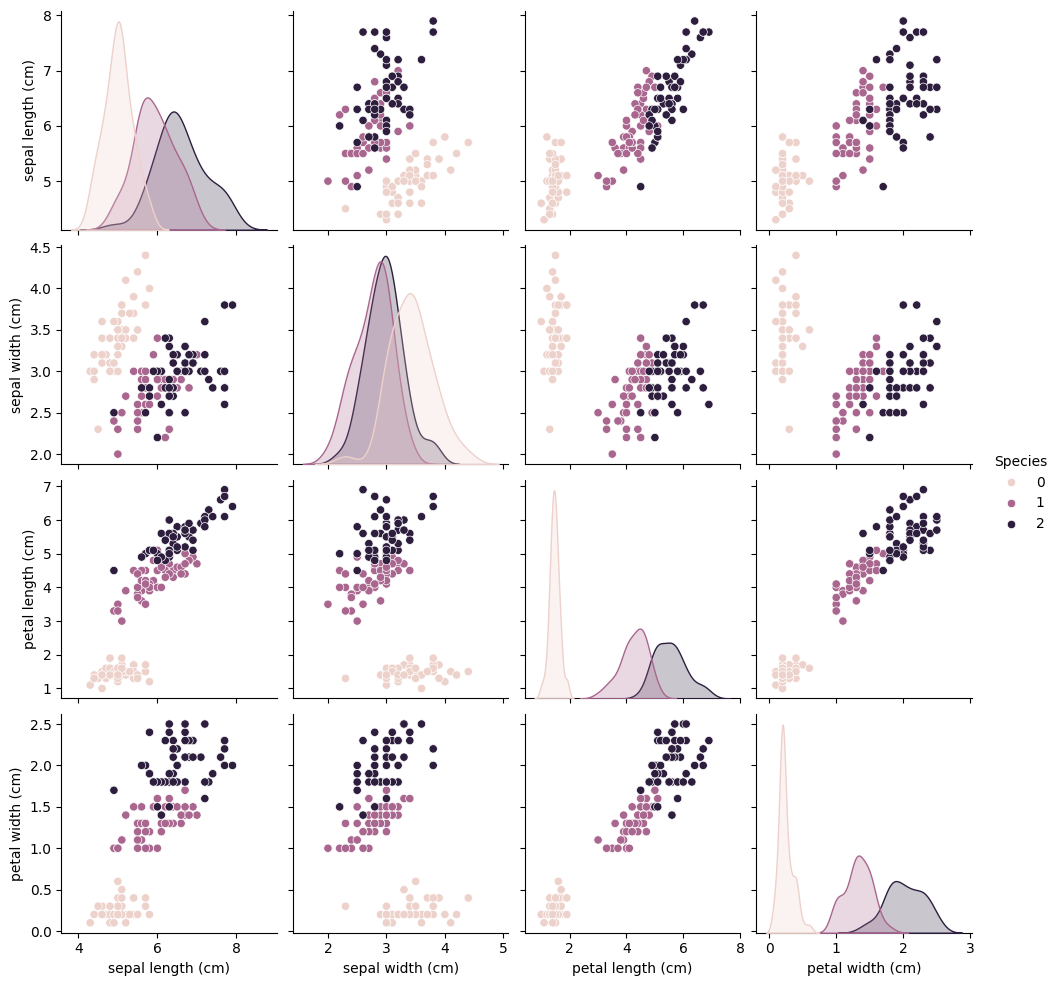

In [19]:
#Pairplotforvisualization
sns.pairplot(data=df,hue='Species')

In [17]:
# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y], palette='deep', edgecolor='k')
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.title(title)
    plt.show()

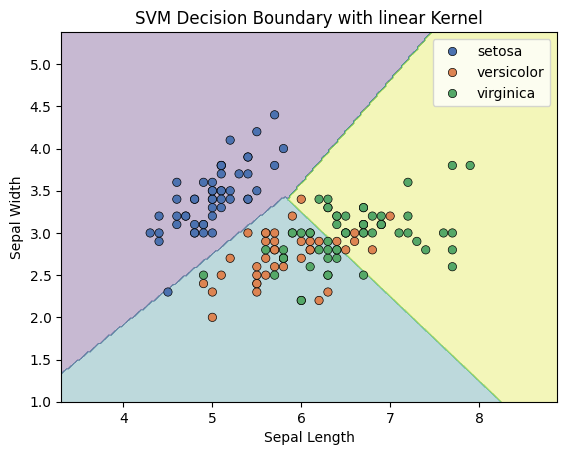

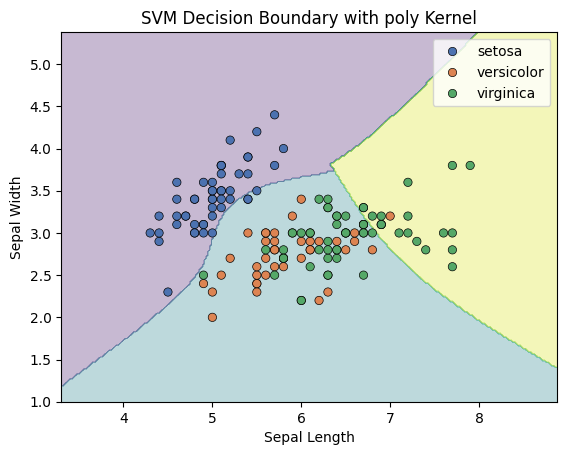

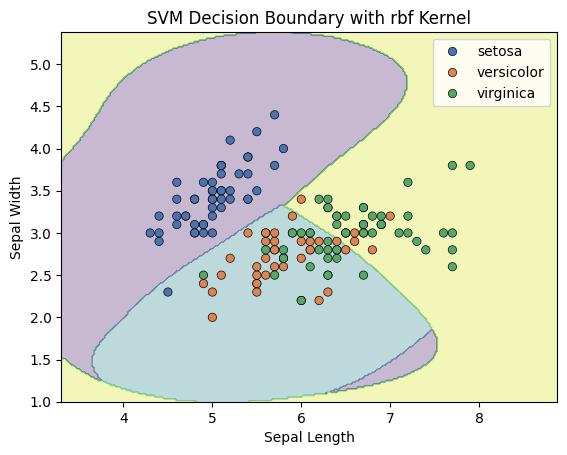

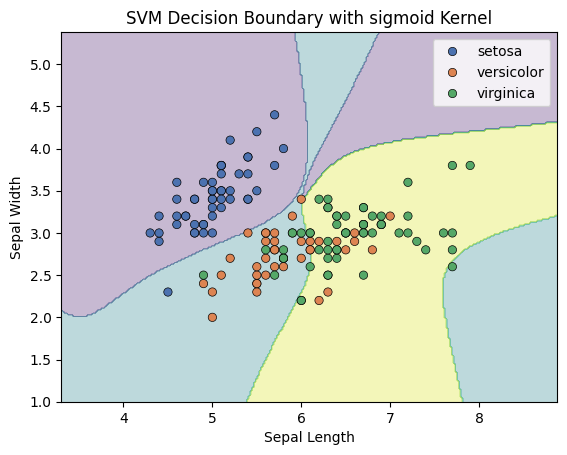

In [18]:
# Plot decision boundaries for each kernel
for kernel, model in models.items():
    plot_decision_boundary(model, X, y, f"SVM Decision Boundary with {kernel} Kernel")
